In [ ]:
from PIL import Image
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Histogram Equalisation

In [ ]:
img1 = "/content/0000c8c4-e87a-44b8-84d4-8bebcf75645c.jpeg"
img2 = "/content/000e95dd-09d0-4158-a278-2aeb725a6c24.jpeg"
img3 = "/content/00a83991-8522-45b9-a102-61cbe9f0dff5.jpeg"

(-0.5, 223.5, 223.5, -0.5)

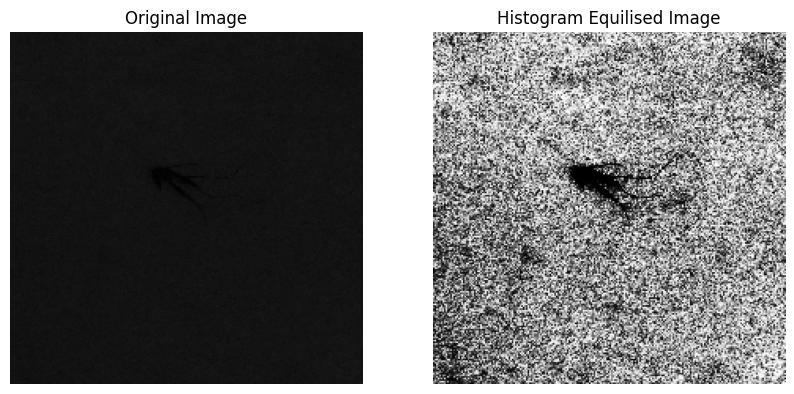

In [ ]:
# Load the original image
original_img = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
original_img = cv2.resize(original_img, (224, 224))

equalized_img = cv2.equalizeHist(original_img)

fig, ax = plt.subplots(1, 2, figsize = (10, 10))
ax[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
ax[1].set_title("Histogram Equilised Image")
ax[1].axis('off')

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [ ]:
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8,8))
equalized_img_clahe = clahe.apply(original_img)

median_filtered_img = cv2.medianBlur(equalized_img_clahe, 5)

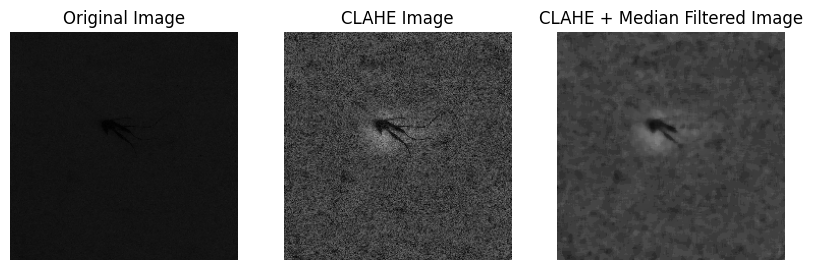

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (10, 10))
ax[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(equalized_img_clahe, cv2.COLOR_BGR2RGB))
ax[1].set_title("CLAHE Image")
ax[1].axis('off')

ax[2].imshow(cv2.cvtColor(median_filtered_img, cv2.COLOR_BGR2RGB))
ax[2].set_title("CLAHE + Median Filtered Image")
ax[2].axis('off')

plt.show()

# MERNET Transformer

In [ ]:
import numpy as np # array manipulation
from huggingface_hub import from_pretrained_keras # download the model
import keras # deep learning
from PIL import Image # Image processing
import matplotlib.pyplot as plt

In [ ]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

demo.png:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

model.png:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

(…)fevents.1645063841.e472ca747184.299.1.v2:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

variables/variables.index:   0%|          | 0.00/219k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

(…)fevents.1645063719.e472ca747184.299.0.v2:   0%|          | 0.00/4.56M [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

(…)fevents.1645062781.9310af7fd322.357.0.v2:   0%|          | 0.00/481k [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/437M [00:00<?, ?B/s]

In [ ]:
def low_to_high(path):
    low_light_img = Image.open(path).convert('RGB')
    low_light_img = low_light_img.resize((224, 224), Image.NEAREST)

    image = keras.preprocessing.image.img_to_array(low_light_img)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)

    output = model.predict(image)  # model inference to enhance the low light pics
    output_image = output[0] * 255.0
    output_image = np.clip(output_image, 0, 255)
    output_image = output_image.reshape((np.shape(output_image)[0], np.shape(output_image)[1], 3))
    output_image = np.uint8(output_image)

    # Display side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(low_light_img)
    axes[0].set_title('Low-light Image')
    axes[0].axis('off')

    axes[1].imshow(output_image)
    axes[1].set_title('Enhanced Image')
    axes[1].axis('off')

    plt.show()

    return output_image

1/1 [==============================] - 13s 13s/step


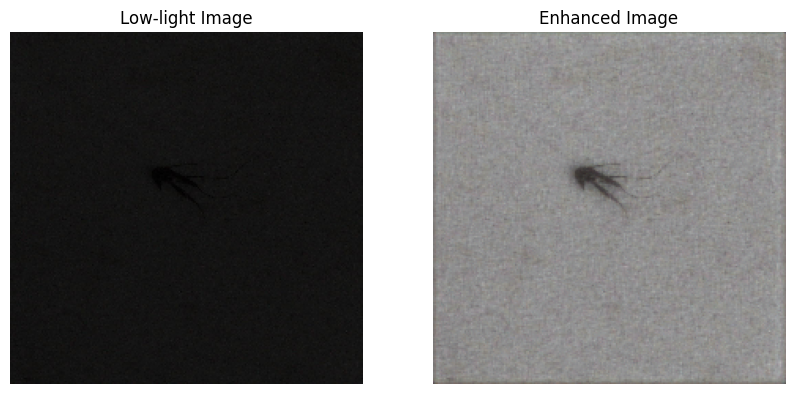

1/1 [==============================] - 14s 14s/step


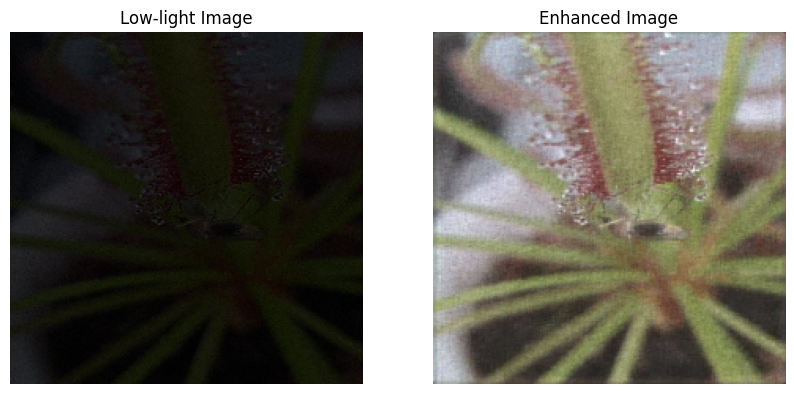

1/1 [==============================] - 13s 13s/step


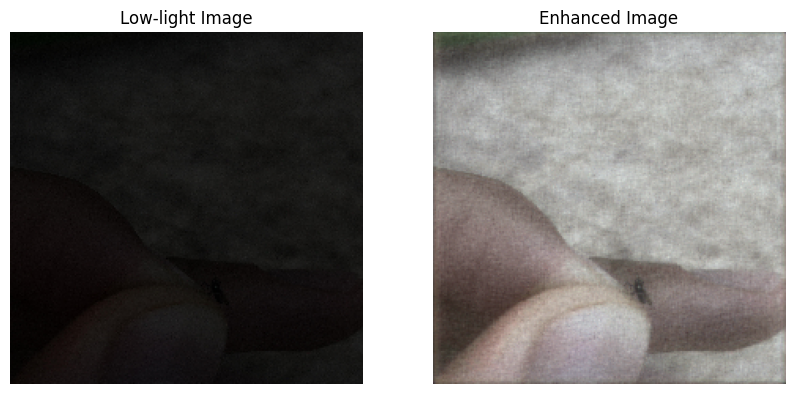

In [ ]:
mos_image_path = [img1, img2, img3]
for paths in mos_image_path:
  enhanced_image = low_to_high(paths)